In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore') # filter some warning messages
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [55]:
ldom = np.array([[35, 55],[-135, -121]])
ldom = np.array([[46, 48],[-125, -123.8]])
qbox = np.array([[-124.5,-124,-124.3,-124.8,-124.5],[46.5,46.5,47.5,47.5,46.5]])
fecha=['1950-01-01','2019-12-31']

In [178]:
#get bathymetry from ETOPO1
fname_topo = '~/Documents/LargeData/Etopo/ETOPO1_Ice_g_gmt4.grd'
ds_topo = xr.open_dataset(fname_topo)
ds_topo.close()
topo = ds_topo.z  #(10801, 21601)
topo2=topo.sel(y=slice(ldom[0,0],ldom[0,1]),x=slice(ldom[1,0],ldom[1,1]))
x = topo2.x  #21601
y = topo2.y   #10801
X,Y=np.meshgrid(x,y)

<xarray.DataArray 'z' (y: 120, x: 73)>
array([[-1280., -1270., -1085., ...,   204.,   210.,   241.],
       [-1273., -1156., -1061., ...,   209.,   306.,   382.],
       [-1247., -1056., -1037., ...,   172.,   311.,   353.],
       ...,
       [ -112.,  -110.,  -105., ...,   771.,   806.,   874.],
       [ -112.,  -109.,  -103., ...,  1082.,  1226.,  1154.],
       [ -111.,  -105.,  -101., ...,   963.,  1106.,   877.]])
Coordinates:
  * x        (x) float64 -125.0 -125.0 -125.0 -125.0 ... -123.8 -123.8 -123.8
  * y        (y) float64 46.0 46.02 46.03 46.05 ... 47.93 47.95 47.97 47.98
Attributes:
    long_name:     z
    actual_range:  [-10898.   8271.]

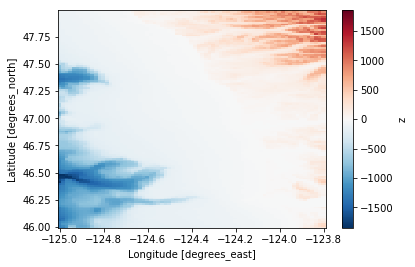

In [179]:
topo2.plot()
topo2

In [180]:
# create mask
topo2 = xr.where(topo2.y>46.5,topo2,np.nan)
topo2 = xr.where(topo2.y<47.5,topo2,np.nan)
topo2 = xr.where(topo2.x<-124.05,topo2,np.nan)
topo2 = xr.where(topo2.x>-125,topo2,np.nan)
topo2 = xr.where(topo2<0,topo2,np.nan)
topo2 = xr.where(((topo2.x>-124.14)&(topo2.y>46.9)),np.nan,topo2)
topo_mask = xr.where(topo2>-120,topo2,np.nan)
topo_mask = topo_mask*0+1

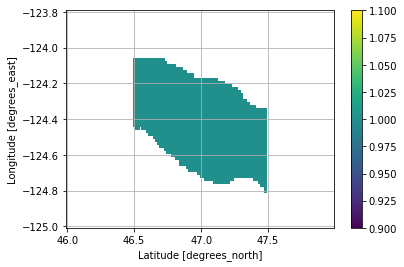

In [185]:
topo_mask.plot()
plt.grid()

In [184]:
topo_mask.rename({'x':'lon','y':'lat'})

<xarray.DataArray (lon: 73, lat: 120)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float64 -125.0 -125.0 -125.0 -125.0 ... -123.8 -123.8 -123.8
  * lat      (lat) float64 46.0 46.02 46.03 46.05 ... 47.93 47.95 47.97 47.98

In [189]:
topo_mask.to_netcdf('./QIN_mask.nc')